In [1]:
import networkx as nx
import os
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import datetime
import pytz
import matplotlib.pyplot as plt
import preprocessing as prep

In [2]:
%matplotlib inline

In [3]:
def getGraphs(path):
    graph_files = os.listdir(path)
    
    graph_list = []

    for eg in graph_files:
        G = nx.read_graphml(path+eg)
        date = eg.split("_")[0]
        date_dt = datetime.datetime.strptime(date, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=pytz.UTC)
        date_ts = date_dt.timestamp()
        graph_list.append((date_dt,G))
    
    return graph_list

# Tagesnetzwerke

In [4]:
gg = getGraphs("networks-days/")

In [82]:
dfd = getIdDF(gg)

In [83]:
dfd

,nodes
date,
2015-08-21 00:00:00+00:00,"[12, 2053, 3223, 3328, 3116, 2734, 3907, 2270,..."
2015-08-22 00:00:00+00:00,"[12, 2053, 3223, 3328, 2851, 788, 2058, 2176, ..."
2015-08-23 00:00:00+00:00,"[2053, 1643, 3223, 3328, 3116, 2176, 3907, 227..."
2015-08-24 00:00:00+00:00,"[2664, 1622, 3328, 3116, 2176, 206, 3907, 2270..."
2015-08-25 00:00:00+00:00,"[145, 3256, 2053, 1622, 3328, 3116, 726, 2270,..."


In [84]:
getCore(dfd)

805

In [87]:
diffsd = getDiff(dfd)

In [88]:
diffsd

[(1023, 1202, 1182), (991, 1182, 1155), (938, 1155, 1134), (890, 1134, 1151)]

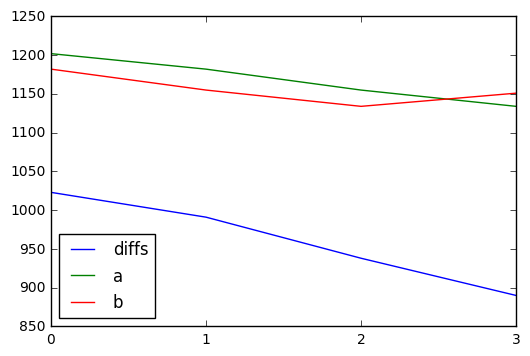

In [105]:
dfdiffsd = DataFrame(diffsd, columns=["diffs", "a", "b"])
dfdiffsd.plot(xlim=(0,3), xticks=[0,1,2,3])

In [108]:
dfdiffsd.diffs.describe()

count       4.000000
mean      960.500000
std        58.631618
min       890.000000
25%       926.000000
50%       964.500000
75%       999.000000
max      1023.000000
Name: diffs, dtype: float64

# Stundennetzwerke

In [58]:
gh = getGraphs("networks-hours/")

In [65]:
def getIdDF(gg):
    nodes = []
    for date,g in gg:
        n=g.nodes()
        nodes.append((date,n))
    
    df=DataFrame(nodes, columns=["date", "nodes"])
    df.set_index("date", inplace=True)
    df = df.sort_index()
    return df

In [66]:
dfh = getIdDF(gh)

In [69]:
dfh.head()

,nodes
date,
2015-08-21 00:00:00+00:00,"[2053, 3223, 3328, 2851, 2734, 3907, 1288, 544..."
2015-08-21 01:00:00+00:00,"[2053, 3223, 3328, 2851, 2734, 3907, 544, 3122..."
2015-08-21 02:00:00+00:00,"[12, 2053, 3223, 3328, 3116, 2734, 3907, 2270,..."
2015-08-21 03:00:00+00:00,"[2053, 3223, 3328, 3116, 2734, 3907, 2270, 257..."
2015-08-21 04:00:00+00:00,"[3047, 3223, 2851, 788, 3907, 2270, 544, 3122,..."


In [72]:
def getCore(df):
    ids = []
    for i in range(df.shape[0]):
        ids.append(set(df.ix[i].nodes))
    
    core = set.intersection(*ids)
    return len(core)

In [73]:
getCore(dfh)

206

In [75]:
def getDiff(df):
    diffs = []
    for i in range(df.shape[0]-1):
        a = set(df.ix[i].nodes)
        b = set(df.ix[i+1].nodes)
        diffs.append((len(set.intersection(a,b)), len(a), len(b)))
    
    return diffs

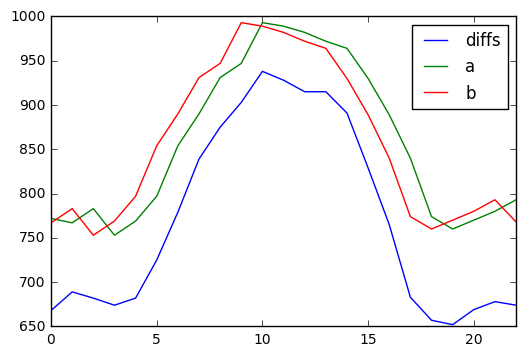

In [111]:
diffsh = getDiff(dfh)
dfdiffsh = DataFrame(diffsh, columns=["diffs", "a", "b"])
dfdiffsh.plot()

In [114]:
dfdiffsh.diffs.describe()

count     23.000000
mean     770.000000
std      107.190994
min      652.000000
25%      676.000000
50%      725.000000
75%      883.000000
max      938.000000
Name: diffs, dtype: float64

In [115]:
dfdiffsh.a.describe()

count     23.000000
mean     856.478261
std       89.030572
min      753.000000
25%      773.000000
50%      840.000000
75%      939.000000
max      993.000000
Name: a, dtype: float64